In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble, metrics, model_selection, neighbors

In [2]:
_names = ['X', 'Y']
training_features = pd.read_csv("../data/geostat_ds/dataset2/XY_100K_15_0247462_06_1", header=None, names=_names)
testing_features = pd.read_csv("../data/geostat_ds/dataset2/XY_10K_15_0247462_06_1", header=None, names=_names)

_names = ['Z']
training_target = pd.read_csv("../data/geostat_ds/dataset2/Z_100K_15_0247462_06_1", header=None, names=_names)
testing_target = pd.read_csv("../data/geostat_ds/dataset2/Z_10K_15_0247462_06_1", header=None, names=_names)


In [3]:
training_features.head()

,X,Y
0,0.202777,0.743389
1,0.340658,0.409216
2,0.647517,0.293828
3,0.840284,0.294774
4,0.554131,0.178439


In [4]:
training_features.describe()

,X,Y
count,100000.000000,100000.000000
mean,0.500267,0.499225
std,0.288632,0.288521
min,0.000107,0.000107
25%,0.249649,0.249332
50%,0.499862,0.499359
75%,0.750271,0.749630
max,0.999893,0.999878


In [5]:
training_target.head()

,Z
0,-0.279565
1,0.393524
2,1.527787
3,1.883848
4,2.228367


In [6]:
training_target.describe()

,Z
count,100000.000000
mean,0.306738
std,1.128796
min,-2.966163
25%,-0.589344
50%,0.259194
75%,1.141982
max,3.936275


In [7]:
testing_features.head()

,X,Y
0,0.866407,0.785855
1,0.371435,0.574319
2,0.004318,0.333654
3,0.221454,0.235599
4,0.648463,0.014511


In [8]:
(training_features.join(training_target)
                  .corr())

,X,Y,Z
X,1.000000,0.000807,0.026555
Y,0.000807,1.000000,-0.626476
Z,0.026555,-0.626476,1.000000


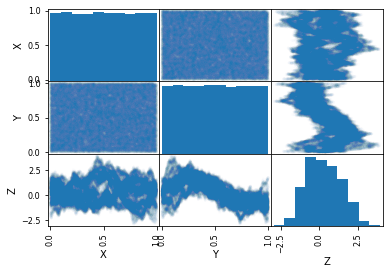

In [9]:
_ = (pd.plotting
       .scatter_matrix(training_features.join(training_target), alpha=0.01))

In [10]:
MSE_SCORING = metrics.make_scorer(score_func=metrics.mean_squared_error, greater_is_better=False)
CV_FOLDS = 8
RANDOM_STATE = np.random.RandomState(42)

In [11]:
_regressor = neighbors.KNeighborsRegressor()

_cv = model_selection.KFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)
_scores = model_selection.cross_val_score(_regressor, training_features, training_target, scoring=MSE_SCORING, cv=_cv, n_jobs=CV_FOLDS)
_training_mse = np.mean(-1.0 * _scores)
print(f"Training MSE: {_training_mse}")

# re-fit on entire training sample
_regressor.fit(training_features, training_target)
_predictions = _regressor.predict(testing_features)
_testing_mse = metrics.mean_squared_error(testing_target, _predictions)
print(f"Testing MSE: {_testing_mse}")


Training MSE: 0.007042948187208002
Testing MSE: 0.006573283635751952


In [12]:
_random_state = np.random.RandomState(42)
_regressor = ensemble.RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=9)

_cv = model_selection.KFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)
_scores = model_selection.cross_val_score(_regressor, training_features, training_target, scoring=MSE_SCORING, cv=_cv, n_jobs=CV_FOLDS)
_training_mse = np.mean(-1.0 * _scores)
print(f"Training MSE: {_training_mse}")

# re-fit on entire training sample
_y = (training_target.values
                     .ravel()) 
_regressor.fit(training_features, _y)
_predictions = _regressor.predict(testing_features)
testing_mse = metrics.mean_squared_error(testing_target, _predictions)
print(f"Testing MSE: {testing_mse}")


Training MSE: 0.007502351658984404
Testing MSE: 0.007029882851933252


In [13]:
_random_state = np.random.RandomState(42)
_regressor = ensemble.GradientBoostingRegressor(random_state=RANDOM_STATE)

_cv = model_selection.KFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)
_scores = model_selection.cross_val_score(_regressor, training_features, training_target, scoring=MSE_SCORING, cv=_cv, n_jobs=CV_FOLDS)
_training_mse = np.mean(-1.0 * _scores)
print(f"Training MSE: {_training_mse}")


# re-fit on entire training sample
_y = (training_target.values
                     .ravel()) 
_regressor.fit(training_features, _y)
_predictions = _regressor.predict(testing_features)
testing_mse = metrics.mean_squared_error(testing_target, _predictions)
print(f"Testing MSE: {testing_mse}")


Training MSE: 0.18362188268942425
Testing MSE: 0.1821424947377342
